In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
reviews = pd.read_csv('olist_reviews.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')
sellers = pd.read_csv('olist_sellers.csv')

In [2]:
df_cus_eng= pd.merge(customers, orders, on="customer_id", how='inner')
df_cus_eng= df_cus_eng.merge(reviews, on="order_id", how='inner')
df_cus_eng= df_cus_eng.merge(order_items, on="order_id", how='inner')
df_cus_eng= df_cus_eng.merge(products, on="product_id", how='inner')
df_cus_eng= df_cus_eng.merge(payments, on="order_id", how='inner')
df_cus_eng= df_cus_eng.merge(sellers, on='seller_id', how='inner')

In [3]:
df_cus_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 113215
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113216 non-null  object 
 1   customer_unique_id             113216 non-null  object 
 2   customer_zip_code_prefix       113216 non-null  int64  
 3   customer_city                  113216 non-null  object 
 4   customer_state                 113216 non-null  object 
 5   order_id                       113216 non-null  object 
 6   order_status                   113216 non-null  object 
 7   order_purchase_timestamp       113216 non-null  object 
 8   order_approved_at              113216 non-null  object 
 9   order_delivered_carrier_date   113216 non-null  object 
 10  order_delivered_customer_date  113216 non-null  object 
 11  order_estimated_delivery_date  113216 non-null  object 
 12  review_id                     

In [4]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df_cus_eng['product_category'] = df_cus_eng.product_category_name.apply(classify_cat)

In [5]:
df_cus_eng.product_category.value_counts()

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

In [6]:
# Convert Datetime features from Object to Datetime
df_cus_eng['order_purchase_timestamp'] = pd.to_datetime(df_cus_eng['order_purchase_timestamp'])
df_cus_eng['order_delivered_customer_date'] = pd.to_datetime(df_cus_eng['order_delivered_customer_date'])
df_cus_eng['order_estimated_delivery_date'] = pd.to_datetime(df_cus_eng['order_estimated_delivery_date'])
df_cus_eng['shipping_limit_date'] = pd.to_datetime(df_cus_eng['shipping_limit_date'])
df_cus_eng['order_delivered_carrier_date'] =pd.to_datetime(df_cus_eng['order_delivered_carrier_date'])

In [7]:
# Feature Engineering by adding colums: order_counts, total_products_purchased, average_order_value 

# Number of Orders per Customer
order_counts = df_cus_eng.groupby('customer_unique_id')['order_id'].nunique()

# Total Products Purchased per Customer
total_products_purchased = df_cus_eng.groupby('customer_unique_id')['order_item_id'].sum()

# Total purchase value for each order
df_cus_eng['total_purchase_value'] = df_cus_eng['order_item_id'] * df_cus_eng['price']

# Average Order Value
average_order_value = df_cus_eng.groupby('customer_unique_id')['payment_value'].mean()

In [8]:
# Time Analysis
# Extract year from the order date
df_cus_eng['order_year'] = df_cus_eng['order_purchase_timestamp'].dt.year

In [9]:
# Extract month from the order date
df_cus_eng['order_month'] = df_cus_eng['order_purchase_timestamp'].dt.month

In [10]:
# Plotting the graphs to analyse purchase history

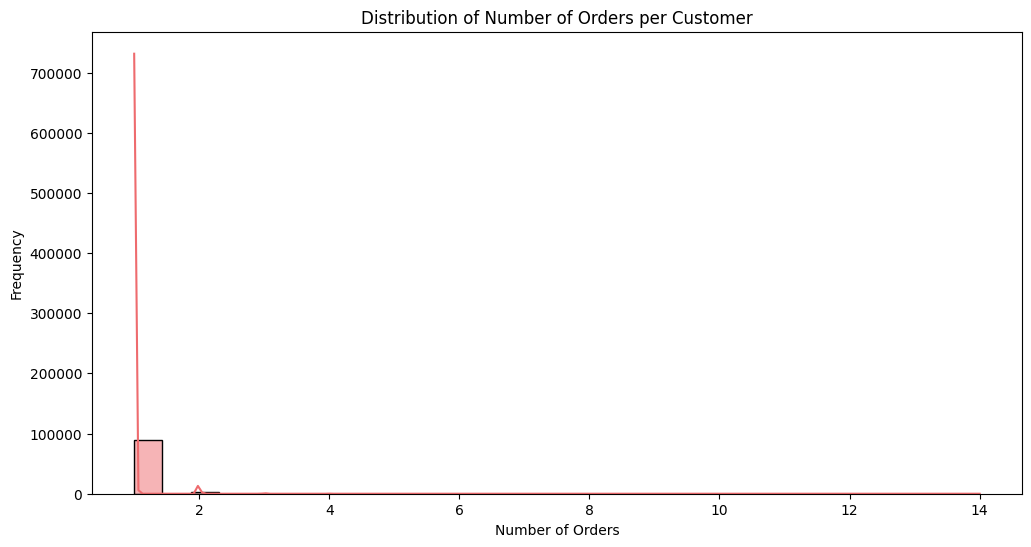

In [11]:
# Distribution of Number of Orders per Customer
plt.figure(figsize=(12, 6))
sns.histplot(order_counts, bins=30, kde=True, color='#EE6B6E')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

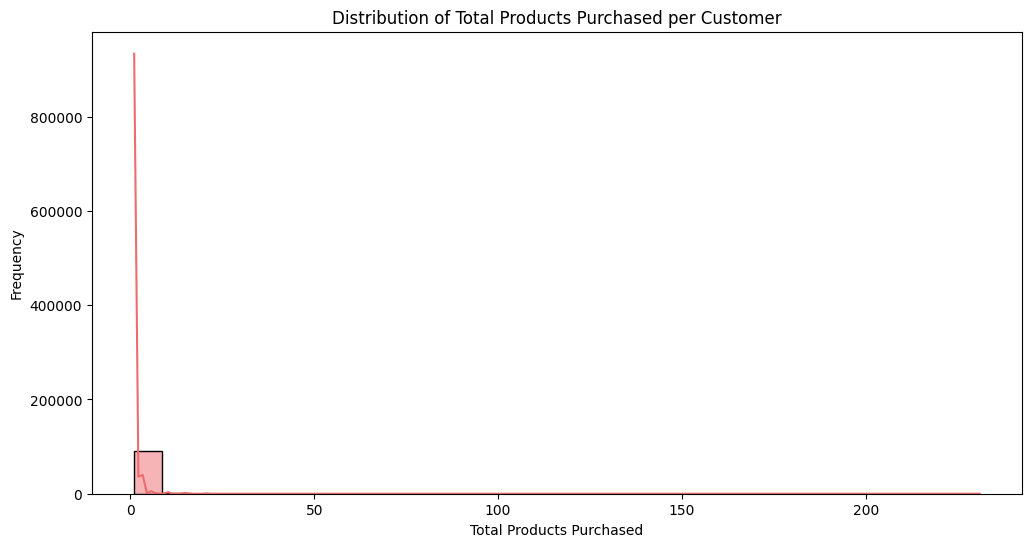

In [12]:
# Distribution of Total Products Purchased per Customer
plt.figure(figsize=(12, 6))
sns.histplot(total_products_purchased, bins=30, kde=True, color='#EE6B6E')
plt.title('Distribution of Total Products Purchased per Customer')
plt.xlabel('Total Products Purchased')
plt.ylabel('Frequency')
plt.show()


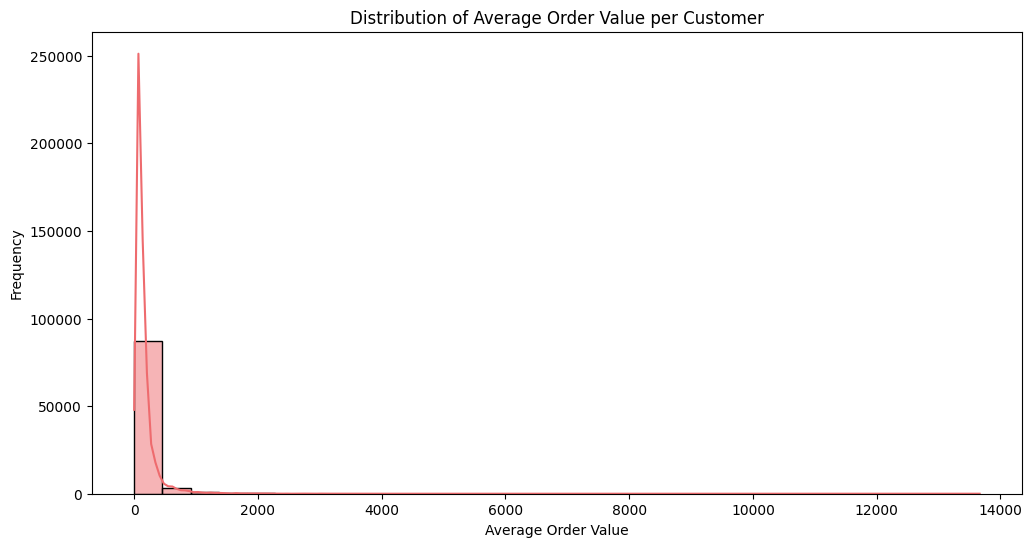

In [13]:
# Distribution of Average Order Value per Customer
plt.figure(figsize=(12, 6))
sns.histplot(average_order_value, bins=30, kde=True, color='#EE6B6E')
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

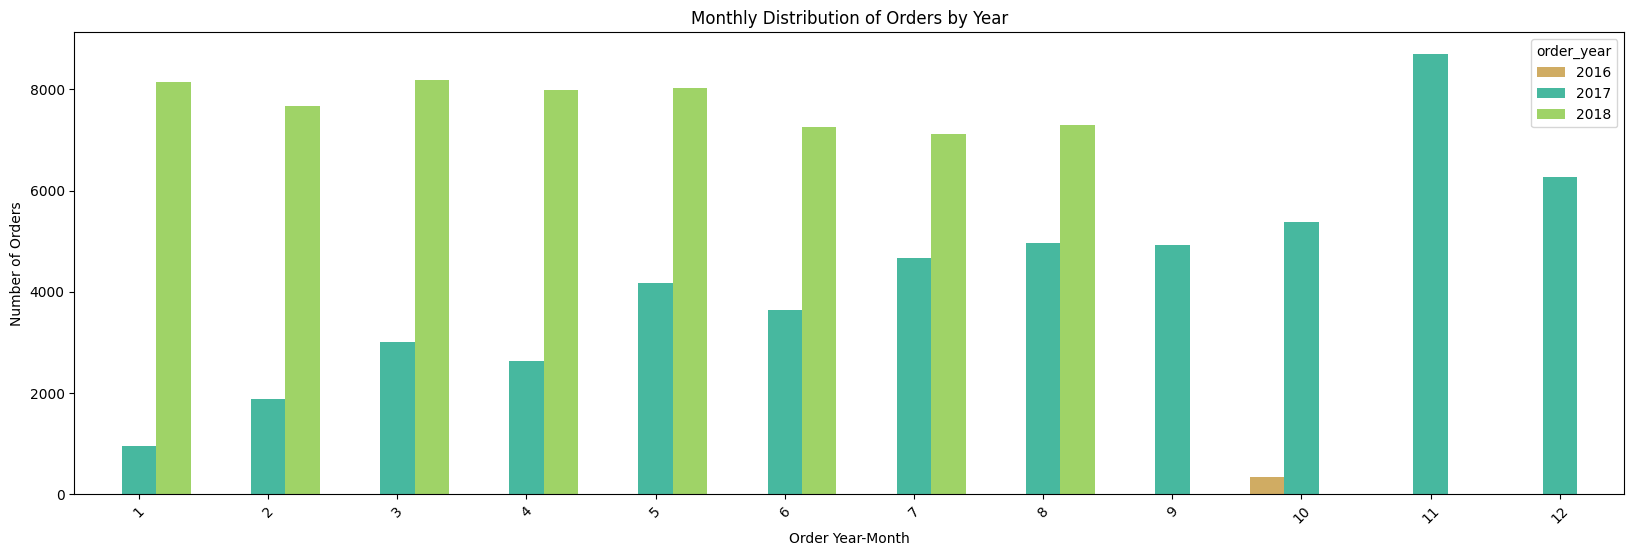

In [14]:
# Monthly Distribution of Orders by Year
plt.figure(figsize=(20, 6))
colors= ['#e2b251', '#34cba9', '#a0e555']
sns.countplot(x='order_month', hue='order_year', data=df_cus_eng, palette=colors)
plt.title('Monthly Distribution of Orders by Year')
plt.xlabel('Order Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Customer Engagement

In [16]:
# RFM Analysis
current_date = pd.to_datetime('today')
rfm_df = df_cus_eng.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'nunique',  # Number of orders
    'payment_value': 'sum'
}).reset_index()
rfm_df

,customer_unique_id,order_purchase_timestamp,order_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,2022,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2025,1,27.19
2,0000f46a3911fa3c0805444483337064,2448,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2232,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2199,1,196.89
...,...,...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,2358,1,4134.84
91480,fffea47cd6d3cc0a88bd621562a9d061,2173,1,84.58
91481,ffff371b4d645b6ecea244b27531430a,2479,1,112.46
91482,ffff5962728ec6157033ef9805bacc48,2030,1,133.69


In [17]:
# Rename columns for clarity
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2022,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2025,1,27.19
2,0000f46a3911fa3c0805444483337064,2448,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2232,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2199,1,196.89
...,...,...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,2358,1,4134.84
91480,fffea47cd6d3cc0a88bd621562a9d061,2173,1,84.58
91481,ffff371b4d645b6ecea244b27531430a,2479,1,112.46
91482,ffff5962728ec6157033ef9805bacc48,2030,1,133.69


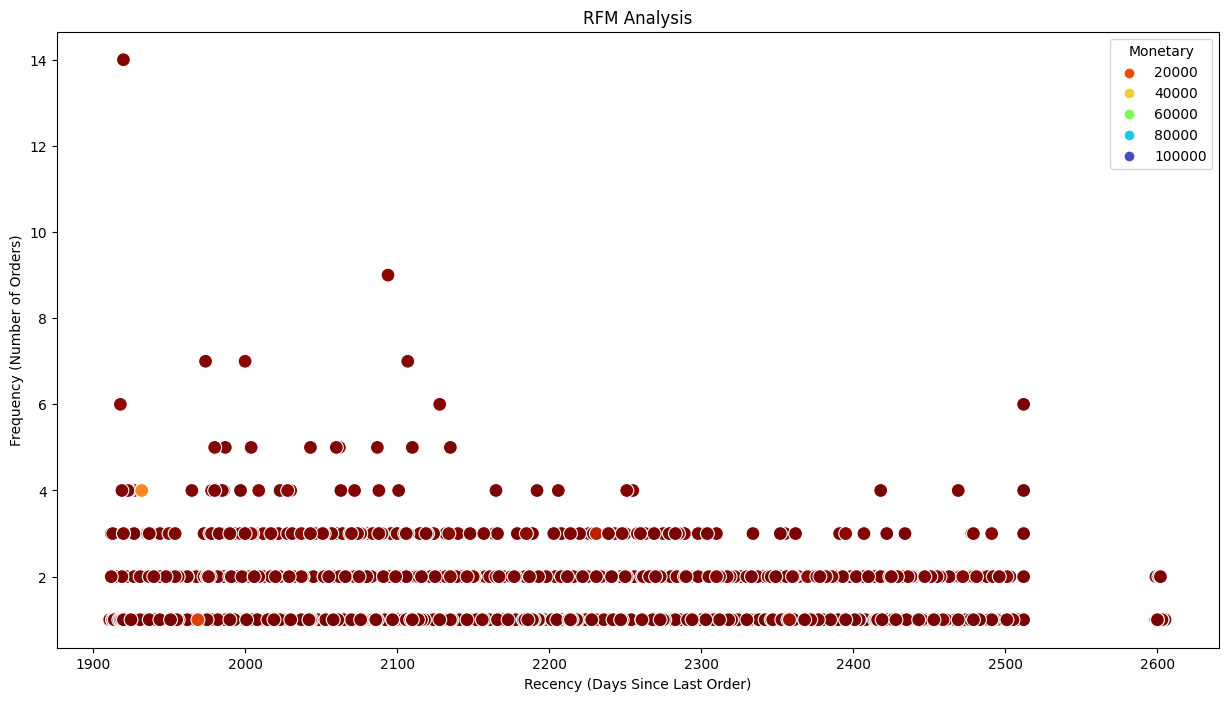

In [80]:
# Visualize the distribution of clusters
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=rfm_df, palette='turbo_r', s=100)
plt.title('RFM Analysis')
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Frequency (Number of Orders)')
plt.show()

In [19]:
# Aggregate features at the customer level
customer_data = df_cus_eng.groupby('customer_unique_id').agg({
    'order_id': 'nunique',          # Number of orders
    'total_purchase_value': 'sum',  # Total purchase value
    'product_id': 'nunique'         # Number of unique products purchased
}).reset_index()

customer_data

,customer_unique_id,order_id,total_purchase_value,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,1
2,0000f46a3911fa3c0805444483337064,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,1
...,...,...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,1,2250.00,2
91480,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,1
91481,ffff371b4d645b6ecea244b27531430a,1,89.90,1
91482,ffff5962728ec6157033ef9805bacc48,1,115.00,1


In [20]:
# Model implementation

In [21]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = customer_data.drop(['customer_unique_id', 'product_id'], axis=1)
y = customer_data['product_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Model Traning

# The Mean Squared Error (MSE) is a measure of how well a regression model performs. It quantifies the average squared difference between predicted values and actual values.
# The predicted number of products is the output of your regression models, indicating the model's estimation of the number of products a customer is likely to purchase. 

In [23]:
# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Evaluate Model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Random Forest Mean Squared Error: {mse}')

# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value': [500]})
predicted_products = rf_model.predict(new_data)
print(f'Predicted Products: {predicted_products}')


Random Forest Mean Squared Error: 0.06525772286124895
Predicted Products: [9.56]


In [25]:
# The Random Forest model based on the provided MSE, has a moderately low error. 
# The predicted number of products for the test data is 9.18.

In [26]:
# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')

# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value': [500]})
predicted_products = linear_model.predict(new_data)
print(f'Predicted Products: {predicted_products}')

Linear Regression Mean Squared Error: 0.06248515687563809
Predicted Products: [957.68635087]


In [28]:
# The Linear Regression model has a slightly lower MSE compared to the Random Forest. 
# However, the predicted number of products is unexpectedly high (957.69). 
# This could indicate that the model is not performing well or that there might be an issue with the data or feature engineering.

In [29]:
# XGBoost

In [30]:
from xgboost import XGBRegressor

# Create an XGBoost model
xgb_model = XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Mean Squared Error: {xgb_mse}')

# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value': [500]})
predicted_products = xgb_model.predict(new_data)
print(f'Predicted Products: {predicted_products}')

XGBoost Mean Squared Error: 0.05915506835024277
Predicted Products: [9.347738]


In [31]:
# Low MSE compared to random forest and linear regression 
# better overall performance

In [32]:
# Support Vector Regression (SVR)

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVR model with standardization
svr_model = make_pipeline(StandardScaler(), SVR())

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_predictions)
print(f'SVR Mean Squared Error: {svr_mse}')

# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value': [500]})
predicted_products = svr_model.predict(new_data)
print(f'Predicted Products: {predicted_products}')

SVR Mean Squared Error: 0.07132927781534072
Predicted Products: [2.2738697]


In [34]:
# higher MSE compared to Random Forest and XGBoost
# suggesting that it may not perform as well on this dataset

In [35]:
# Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')


# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value': [500]})
predicted_products = lasso_model.predict(new_data)
print(f'Predicted Products: {predicted_products}')

Lasso Regression Mean Squared Error: 0.06648938098830612
Predicted Products: [709.47769741]


In [37]:
# lower MSE compared to SVR but still higher than XGBoost
# the predicted number of products from the Lasso Regression model is unexpectedly high


In [38]:
# XGBoost model is choosen since it has the lowest MSE among the others models
# XGBoost indicating better overall performance in terms of minimizing the squared differences between predicted and actual values

In [39]:
# Fine-Tuning XGBoost Hyperparameters
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgb_model = XGBRegressor()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
best_xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the model
best_xgb_mse = mean_squared_error(y_test, best_xgb_predictions)
print(f'Best XGBoost Mean Squared Error: {best_xgb_mse}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost Mean Squared Error: 0.058574971416498055


In [40]:
# Best Hyperparameters:
# Learning Rate: 0.1
# Max Depth: 3
# Number of Estimators: 200
# Best XGBoost Mean Squared Error: 0.0586

# The MSE has decreased, indicating that the model is now better at minimizing the squared differences between predicted and actual values. 

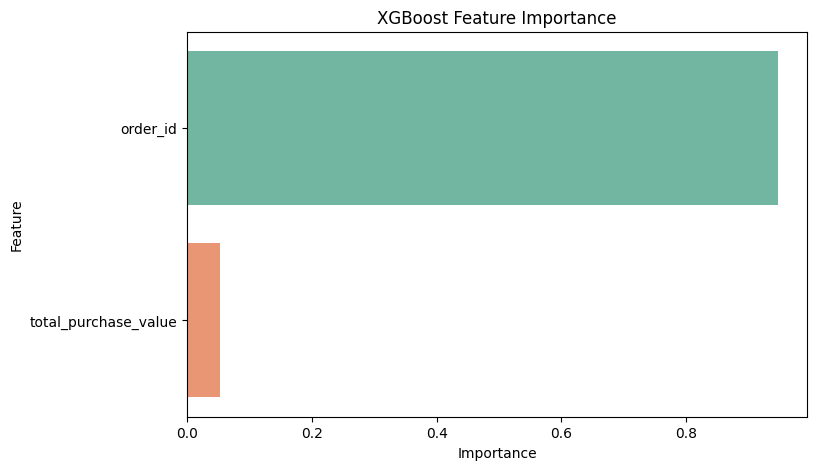

In [70]:
# Feature Importance in XGBoost

# Get feature importance from the best XGBoost model
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Set2')
plt.title('XGBoost Feature Importance')
plt.show()


In [42]:
# Model Validation

# Validate the best XGBoost model using cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
average_cross_val_mse = -cross_val_scores.mean()
print(f'Average Cross-Validation MSE: {average_cross_val_mse}')


Average Cross-Validation MSE: 0.05482743751750856


In [43]:
# This metric provides an estimate of how well XGBoost model generalizes to new, unseen data.
# MSE of 0.0548 suggests the squared differences between predicted and actual values are relatively small in average.

In [44]:
# Comparison with Holdout Test Set
from sklearn.metrics import mean_squared_error

# Assuming you have a holdout test set (X_test, y_test)
y_pred_test = best_xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Test Set MSE: {test_mse}')


Test Set MSE: 0.058574971416498055


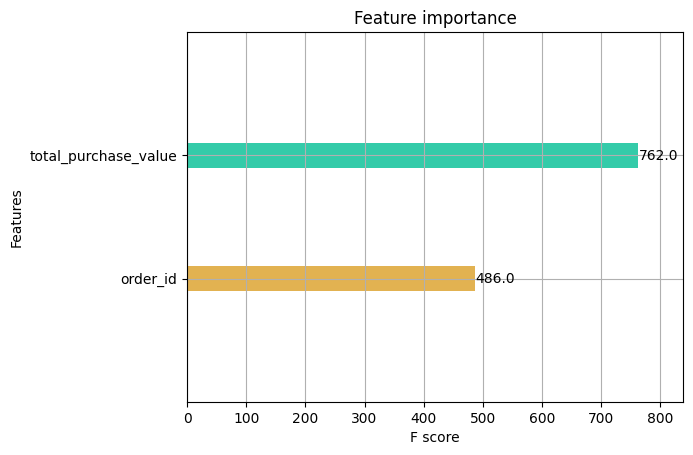

In [73]:
# Feature Importance Visualization
from xgboost import plot_importance
colors= ['#e2b251', '#34cba9']

# Plot feature importance
plot_importance(best_xgb_model, color=colors)
plt.show()


In [46]:
# The F-score reflects the relative importance of each feature in the context of XGBoost model. 
# Higher F-scores indicate more important features according to the model.


# total_purchase_value (F-score: 762.0):
# This feature has a higher importance according to the model. The F-score of 762.0 suggests that total_purchase_value is a significant contributor to the model's predictions.

# order_id (F-score: 486.0):
# This feature is also important but has a slightly lower F-score compared to total_purchase_value. It indicates that order_id plays a role in the model's decision-making, but it might be somewhat less influential compared to total_purchase_value.

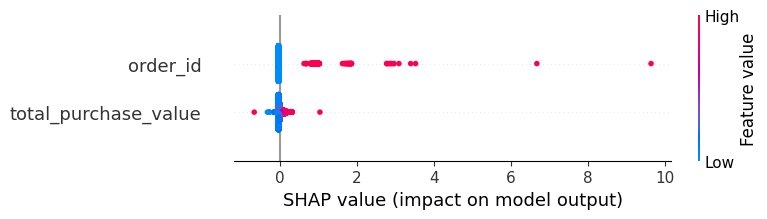

In [76]:
# Interpretability using SHAP
import shap

# Create an explainer for the best XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [48]:
# SHAP values provide a way to fairly distribute the contribution of each feature to the prediction made by a machine learning model. 
# They help to understand the impact of each feature on the model's output.


# Negative SHAP Values: Indicate a decrease in the predicted output. The feature is pushing the model's prediction lower.
# Positive SHAP Values: Indicate an increase in the predicted output. The feature is pushing the model's prediction higher.


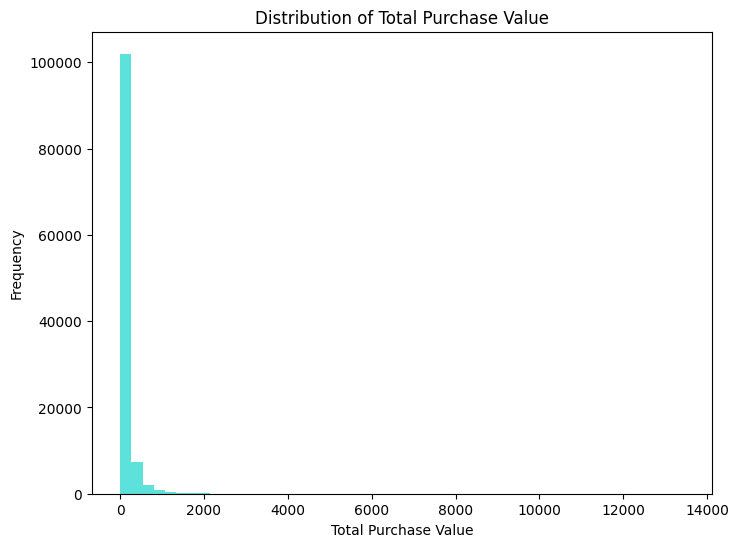

In [90]:
# Feature Distribution Analysis
# total_purchase_value

# Set the color palette to 'turbo_r'
cmap = plt.get_cmap('turbo_r')

# Plot the distribution with the specified color palette
plt.figure(figsize=(8, 6))
plt.hist(df_cus_eng['total_purchase_value'], bins=50, color=cmap(0.7), alpha=0.7)
plt.title('Distribution of Total Purchase Value')
plt.xlabel('Total Purchase Value')
plt.ylabel('Frequency')
plt.show()


In [50]:
df_cus_eng.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category', 'total_purchase_value', 'order_year',
       'order_month'],
      dtype='object')

In [51]:
# Assuming your DataFrame is named df_cus_eng
# Group by 'customer_unique_id' and calculate the sum of 'order_item_id' to get the total number of products purchased by each customer
products_purchased_per_customer = df_cus_eng.groupby('customer_unique_id')['order_item_id'].sum().reset_index()

# Rename the columns to be more descriptive
products_purchased_per_customer = products_purchased_per_customer.rename(columns={'order_item_id': 'number_of_products_purchased'})

# Merge the result back into the original DataFrame based on 'customer_unique_id'
df_cus_eng = pd.merge(df_cus_eng, products_purchased_per_customer, on='customer_unique_id', how='inner')

df_cus_eng.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category,total_purchase_value,order_year,order_month,number_of_products_purchased
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2,146.87,8577,itaquaquecetuba,São Paulo,Furniture,124.99,2017,5,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,275.79,8577,itaquaquecetuba,São Paulo,Furniture,112.99,2017,11,3
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,275.79,8577,itaquaquecetuba,São Paulo,Furniture,225.98,2017,11,3
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,Rio Grande do Sul,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,7,140.61,8577,itaquaquecetuba,São Paulo,Furniture,124.99,2017,5,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,Rio de Janeiro,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,10,137.58,8577,itaquaquecetuba,São Paulo,Furniture,106.99,2018,2,1


In [52]:
products_purchased_per_customer

,customer_unique_id,number_of_products_purchased
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,3
91480,fffea47cd6d3cc0a88bd621562a9d061,1
91481,ffff371b4d645b6ecea244b27531430a,1
91482,ffff5962728ec6157033ef9805bacc48,1


In [53]:
print(len(df_cus_eng['total_purchase_value']))
print(len(df_cus_eng['number_of_products_purchased']))


113216
113216


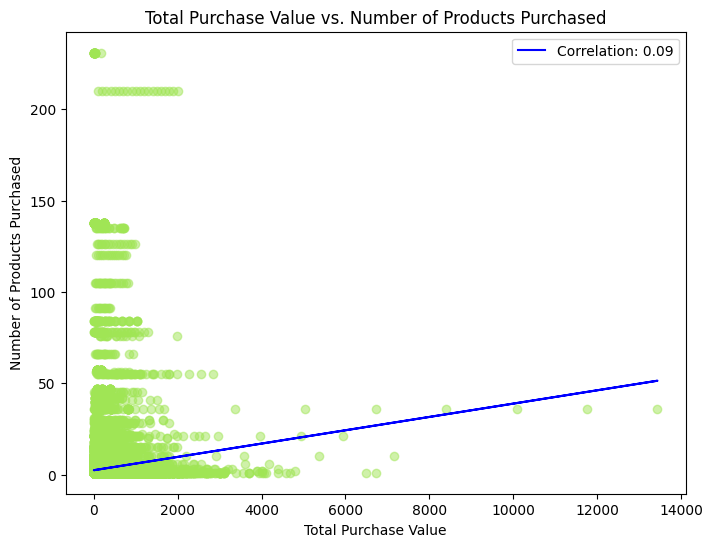

In [92]:
# Set colors
scatter_color = '#a0e555'
correlation_line_color = 'blue'

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cus_eng['total_purchase_value'], df_cus_eng['number_of_products_purchased'], alpha=0.5, color=scatter_color)
plt.title('Total Purchase Value vs. Number of Products Purchased')
plt.xlabel('Total Purchase Value')
plt.ylabel('Number of Products Purchased')

# Calculate the correlation coefficient
correlation_coefficient = df_cus_eng['total_purchase_value'].corr(df_cus_eng['number_of_products_purchased'])

# Draw the correlation line
line = np.polyfit(df_cus_eng['total_purchase_value'], df_cus_eng['number_of_products_purchased'], 1)
plt.plot(df_cus_eng['total_purchase_value'], line[0] * df_cus_eng['total_purchase_value'] + line[1], color=correlation_line_color, label=f'Correlation: {correlation_coefficient:.2f}')

plt.legend()
plt.show()

In [55]:
# Correlation Analysis

correlation_total_purchase = df_cus_eng['total_purchase_value'].corr(df_cus_eng['number_of_products_purchased'])
print(f'Correlation between Total Purchase Value and Number of Products Purchased: {correlation_total_purchase}')


Correlation between Total Purchase Value and Number of Products Purchased: 0.09469044805872913


In [56]:
# export your trained XGBoost model to a format that can be easily loaded for predictions
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb_model, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [57]:
# to run the model in streamlit

In [58]:
# import streamlit as st
# import joblib
# import pandas as pd

# # Load the trained XGBoost model
# model = joblib.load('xgboost_model.joblib')

# # Define the input features
# input_features = ['feature1', 'feature2', 'feature3']  # Replace with your actual feature names

# def main():
#     st.title('XGBoost Model Deployment')

#     # Get user input
#     feature_values = get_user_input()

#     # Make a prediction
#     prediction = predict(feature_values)

#     # Display the result
#     display_result(prediction)

# def get_user_input():
#     st.sidebar.header('User Input')
#     feature_values = []

#     for feature in input_features:
#         value = st.sidebar.number_input(f'Enter value for {feature}', step=1.0)
#         feature_values.append(value)

#     return feature_values

# def predict(features):
#     # Make a prediction using the loaded model
#     prediction = model.predict([features])[0]
#     return prediction

# def display_result(prediction):
#     st.subheader('Prediction Result')
#     st.write(f'The predicted number of products purchased is: {prediction}')

# if __name__ == '__main__':
#     main()